<a href="https://colab.research.google.com/github/quddaz/Machine_Learing/blob/main/5%EC%9E%A5/5-3%20%EC%95%99%EC%83%81%EB%B8%94ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리의 앙상블

+ 여러 결정 트리를 결합하여 보다 강력한 모델을 만드는 머신러닝 기법
+ 가장 좋은 알고리즘이 있다고 다른 알고리즘을 배우지 않으면 안됨
+ 보편적으로 성능이 좋아 널리 사용되는 알고리즘이 있지만 문제마다 다를 수 있으므로 어떤 알고리즘이 더 뛰어나다고 판단해서는 안된다.

### 정형 데이터 VS 비정형 데이터

+ 정형 데이터 : CSV, 데이터베이스, 액셀
+ 비정형 데이터 : 책이나 글의 텍스트 데이터, 디지털카메라 사진, 음악파일 등

+ 앙상블 학습
 + 여러 모델을 합쳐서 하나의 모듈을 만들어낸다
  + 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘
  + 대부분 결정 트리에서 만들어짐

## 랜덤 포레스트

### 랜덤 포레스트란?

+ 앙상블 학습의 대표이며 안정적이기 때문에 널리 사용된다.
+ 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만든다.
+ 각 결정 트리의 예측을 사용해 최종 예측을 만든다.

### 부트스트랩 샘플

+ 훈련 데이터에서 중복을 허용하여 랜덤하게 추출
+ 훈련 세트의 크기와 같게 만든다.

### 랜덤 포레스트 훈련 방법

+ 전체 특성 중 일부 특성을 무작위로 고르는 방법
 + 분류 모델 : RandomForestCalssifier, 전체 특성 개수의 제곱근
 + 회귀 모델 : RandomForestRegerssor, 전체 특성
+ 사이킷런의 랜덤 포레스트는 100개의 결정 트리를 선택하고, 분류할 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측한다.
+ 회귀는 각 트리의 예측을 평균



> 랜덤 포레스트의 장점

+ 훈련 세트에 과대적합되는 것을 막는다.
+ 검증 세트와 테스트 세트에서 안정적인 성능
+ 기본 설정만으로 좋은 결과를 얻을 수 있음



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


과대 적합인 것을 확인할 수 있다.
+ 랜덤 포레스트는 결정 트리의 앙상블이기 때문에 결정 트리의 매개변수를 모두 사용할 수 있다.
+ 매개변수를 이용하여 과대적합을 막고 조정을 하여 가장 좋은 랜덤 포레스트를 할 수 있다.

In [4]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


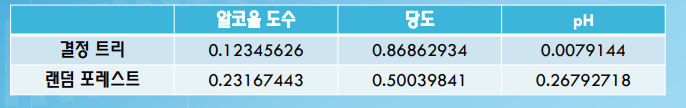

+ 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하여, 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성들이 훈련에 기여할 기회를 얻게 할 수 있다.
+ 그러므로 과대적합을 줄이고 일반화 성능을 높인다.

#### OOB 샘플

OOB 샘플 : 부트스트랩 샘플에 포함되지 않고 남은 샘플을 의미한다.
+ OOB 점수를 이용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플 사용이 가능하다.
+ 좋은 평가를 위해 자원을 사용할지 결정이 가능하다.

In [5]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라 트리

+ 랜덤 포레스트와 비슷하지만 부트스트랩 샘플을 사용하지 않음(전체 훈련을 진행)
+ 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 랜덤하게 분할
+ 결정 트리의 매개변수 splitter = 'random'와 비슷
+ 무작위성이 랜덤 포레스트보다 크기 때문에 많은 훈련을 해야 하지만 랜덤하게 노드를 분할하기 때문에 빠른 속도가 장점
+ **항상 랜덤이란 많은 훈련이 필요하다는 것을 기억하자**

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


랜덤 포레스트의 결과와 비슷하다.
+ 엑스트라 트리는 무작위성이 크기 때문에 포레스트보다 결정 트리를 더 많이 훈련 해야한다.
+ 랜덤하게 노드를 분할하기 때문에 빠른 계산 속도

In [7]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅

+ 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블을 한다.
+ 깊이가 3인 결정 트리 100개 사용
+ 깊이가 얕은 결정 트리를 쓰기 때문에 과대 적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있다.
+ 경사 하강법을 사용하여 트리를 앙상블에 추가
+ 분류에서는 로지스틱 손실 함수를 사용하고, 회귀에서는 평균 제곱 오차 함수 사용
+ 그레이디언트 부스팅은 결정 트리를 계속 추가하면서 가장 낮은 곳(손실이 작은)을 찾아 이동
+ 학습률 매개변수로 속도를 조절할 수 있다.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


과대적합이 되지 않은 적당한 결과를 얻는다.
+ 그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강함
+ 트리가 3인 결정 트리를 쓰기 때문이다.

학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 상승한다.

In [9]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


트리의 개수를 500개로 늘려 속도는 느려졌지만 좋은 성능이 나온다.

그러나 확률적 경사하강법을 사용하여 n_jobs 매개변수의 의미가 없다.
+ 정리하자면 그레이디언트 부스팅은 랜덤 포레스트보다 조금 더 높은 성능을 얻지만 n_jobs를 사용할 수 없어 병렬처리를 못하기 때문에 속도가 느리다.

In [10]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


### 히스토그램 기반 그레이디언트 부스팅

+ 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기있는 알고리즘
+ 입력 특성을 256개의 구간으로 나누므로 노드를 분할할 대 최적의 분할을 매우 빠르게 찾을 수 있음
+ 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위하여 사용하기 때문에 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없다.(255+1)
+ 기본 매개변수로도 안정적인 성능을 얻을 수 있다.

In [11]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236




> 치환 중요도

+ 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변하는지 관찰하여 어떤 특성이 중요한지 계산하는 것이다.
+ 하나씩 특성을 빼고 성능을 평가해 점수를 계산하는 방법이다.



In [16]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


밑에는 테스트 세트에 사용한 것

In [15]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [14]:
hgb.score(test_input, test_target)

0.8723076923076923

+ 87퍼 정도 나왔지만 실전에서는 조금 떨어질 수 있음
+ 앙상블 모델은 단일 결정 트리보다 좋은 결과를 얻을 수 있다.
+ 단점은 매개변수값을 내가 많이 조정해야함

# XGBoost VS LightGBM

In [17]:

from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


In [18]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


+ 결정트리는 냅두면 너무 과대적합이 되어 가지치기가 필요하다.
+ 검증 세트는 훈련 도중에 사용하는 세트이다.
+ 앙상블은 일반적으로 결정 트리에서 나온다.
 + 랜덤 포레스트 : 부트스트랩을 사용
 + 엑스트라 트리 : 결정 트리의 노드를 랜덤하게 분할
 + 그레이디언트 부스팅 : 이전 트리의 손실을 보완하는 식으로 얕은 결정트리를 연속적으로 추가한다.
 + 히스토그램 기반 그레이디언트 부스팅 : 훈련 데이터를 256개의 정수 구간으로 나누어 어디에 위치할 것인가 미리 정한다.